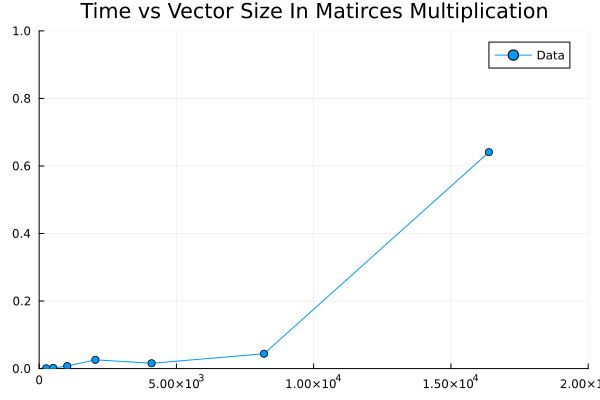

In [14]:
using CUDA
using Plots
using Statistics

N = [2^8, 2^9, 2^10, 2^11, 2^12, 2^13, 2^14]; # creating a N using powers of 2, while 
Time = zeros(Float64, length(N))
num_trials = 10

for i in eachindex(N)
    times = Float64[]
    for _ in 1:num_trials
        a = N[i]
        x_1d = CUDA.randn(Float64, a, a)
        y_1d = CUDA.randn(Float64, a, a)
        append!(times, @elapsed CUDA.@sync x_1d.+ y_1d)
    end
    Time[i] = mean(times)
end


plot(N, Time, title="Time vs Vector Size In Matirces Multiplication", xlims=(0, 2E4), ylims=(0, 1), label="Data", marker=:circle, legend=:topright)